In [1]:
import torch

In [18]:
size = torch.tensor([4.,5.,6.,7.,8.])
price = torch.tensor([3.4, 5.5, 7.4, 9.1, 10.6])

size_n=(size - size.mean()) / size.std()
price_n = (price - price.mean()) / price.std()

In [57]:
def compute(vector, vector2):   
    k = torch.randn(1, requires_grad=True)
    c = torch.randn(1, requires_grad=True)
    b = torch.randn(1, requires_grad=True)

    optimizer = torch.optim.SGD([k,c,b], lr=0.01)

    for _ in range(10001):
        y_ = k*vector**2 + c*vector + b
        loss_vector = (y_ - vector2)**2
        loss = loss_vector.mean()
        optimizer.zero_grad() # clean all grad
        loss.backward() # ~backprob~ step
        optimizer.step()

        if _ % 5000 == 0:
            print('step = ', _)
            print('res = ', y_)
            print('step_loss', loss)
            print('step_grad = ', k.grad)
            print('step_k, c, b = ', k , c, b)
            print('____________')
    return (k, c, b)

In [58]:
compute(size, price)

step =  0
res =  tensor([ -9.8047, -13.5262, -17.8808, -22.8684, -28.4892], grad_fn=<ThAddBackward>)
step_loss tensor(745.0839, grad_fn=<MeanBackward1>)
step_grad =  tensor([-2266.0784])
step_k, c, b =  tensor([22.3442], requires_grad=True) tensor([2.4718], requires_grad=True) tensor([-0.7350], requires_grad=True)
____________
step =  5000
res =  tensor([nan, nan, nan, nan, nan], grad_fn=<ThAddBackward>)
step_loss tensor(nan, grad_fn=<MeanBackward1>)
step_grad =  tensor([nan])
step_k, c, b =  tensor([nan], requires_grad=True) tensor([nan], requires_grad=True) tensor([nan], requires_grad=True)
____________
step =  10000
res =  tensor([nan, nan, nan, nan, nan], grad_fn=<ThAddBackward>)
step_loss tensor(nan, grad_fn=<MeanBackward1>)
step_grad =  tensor([nan])
step_k, c, b =  tensor([nan], requires_grad=True) tensor([nan], requires_grad=True) tensor([nan], requires_grad=True)
____________


(tensor([nan], requires_grad=True),
 tensor([nan], requires_grad=True),
 tensor([nan], requires_grad=True))

In [59]:
k, c, b = compute(size_n, price_n)
print('price =', price)
print('price_poly =', (k*size_n**2 + c*size_n + b) * price.std() + price.mean())

step =  0
res =  tensor([ 0.9292, -0.1093, -0.8010, -1.1460, -1.1442], grad_fn=<ThAddBackward>)
step_loss tensor(2.9704, grad_fn=<MeanBackward1>)
step_grad =  tensor([-0.2599])
step_k, c, b =  tensor([0.4360], requires_grad=True) tensor([-0.7905], requires_grad=True) tensor([-0.7919], requires_grad=True)
____________
step =  5000
res =  tensor([-1.3323, -0.5960,  0.0701,  0.6662,  1.1921], grad_fn=<ThAddBackward>)
step_loss tensor(2.7151e-12, grad_fn=<MeanBackward1>)
step_grad =  tensor([2.4796e-07])
step_k, c, b =  tensor([-0.0877], requires_grad=True) tensor([0.9978], requires_grad=True) tensor([0.0701], requires_grad=True)
____________
step =  10000
res =  tensor([-1.3323, -0.5960,  0.0701,  0.6662,  1.1921], grad_fn=<ThAddBackward>)
step_loss tensor(2.7151e-12, grad_fn=<MeanBackward1>)
step_grad =  tensor([2.4796e-07])
step_k, c, b =  tensor([-0.0877], requires_grad=True) tensor([0.9978], requires_grad=True) tensor([0.0701], requires_grad=True)
____________
price= tensor([ 3.4000, 

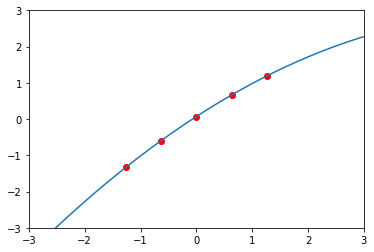

In [60]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot(np.array(size_n), np.array(price_n), 'ro')
plt.axis([-3, 3, -3, 3])
t = np.arange(-3, 3, 0.01)
plt.plot(t, float(k)*t**2 + float(c)*t + float(b))
plt.show()

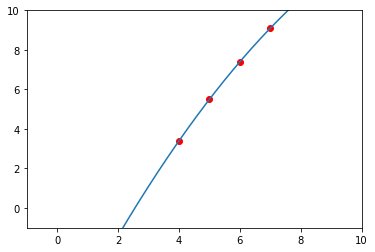

In [65]:
std_s = float(size.std())
mean_s = float(size.mean())

std_p = float(price.std())
mean_p = float(price.mean())

plt.plot(np.array(size), np.array(price), 'ro')
plt.axis([-1, 10, -1, 10])
t = np.arange(-1, 10, 0.001)
plt.plot(t, (float(k)*((t - mean_s)/std_s)**2 + float(c)*(t - mean_s)/std_s + float(b)) * std_p + mean_p)
plt.show()